In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_pickle('Symptoms_Dataset.pkl')
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'stomach_pain',
       'acidity', 'ulcers_on_tongue', 'vomiting', 'fatigue', 'cough',
       'indigestion', 'yellowish_skin', 'loss_of_appetite', 'abdominal_pain',
       'swelling_of_stomach', 'chest_pain', 'cramps', 'bruising', 'obesity',
       'swollen_legs', 'swollen_blood_vessels', 'passage_of_gases',
       'internal_itching', 'red_spots_over_body', 'dischromic _patches',
       'family_history', 'distention_of_abdomen',
       'history_of_alcohol_consumption', 'fluid_overload.1',
       'prominent_veins_on_calf', 'skin_peeling', 'red_sore_around_nose',
       'prognosis'],
      dtype='object')

1 = Fungal Infection </br>
2 = GERD</br>
3 = Peptic Ulcer Disease</br>
4 = Varicose Veins</br>
5 = Alcoholic Hepatitis</br>

In [3]:
data['prognosis'] = data['prognosis'].replace(['Fungal infection', 'GERD', 'Peptic ulcer diseae', 'Varicose veins', 'Alcoholic hepatitis'],[1,2,3,4,5])
x = np.array(data[data.columns[0:-1]])
y = np.array(data['prognosis'])
data

,itching,skin_rash,nodal_skin_eruptions,stomach_pain,acidity,ulcers_on_tongue,vomiting,fatigue,cough,indigestion,...,red_spots_over_body,dischromic _patches,family_history,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,prominent_veins_on_calf,skin_peeling,red_sore_around_nose,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
601,0,0,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2
602,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,3
603,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,0,0,0,5


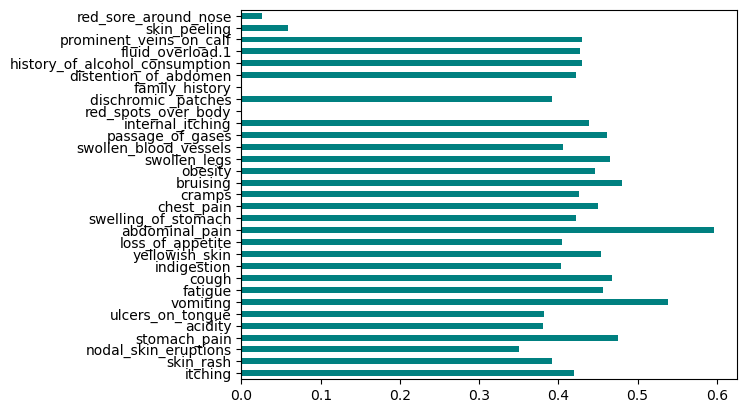

In [4]:
importances = mutual_info_classif(x, y)
feat_importances = pd.Series(importances, data.columns[0:-1])
feat_importances.plot(kind='barh', color= 'teal')
plt.show()

from the given plot we can see few features like 'red_sore_around_nose', 'red_spot_over_body', 'family_history','skin_peeling' holds negligible corelation to the predicted classification. So we will remove the least significant features.

In [5]:
data = data.drop(columns = ['red_sore_around_nose','red_spots_over_body','family_history','skin_peeling'])

In [6]:
x = np.array(data[data.columns[0:-1]])
y = np.array(data['prognosis'])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [7]:
model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

Performing the 5 fold validation

In [8]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')
for fold_num, score in enumerate(scores, start=1):
    print(f"Fold {fold_num} Accuracy: {score:.2f}")
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")

Fold 1 Accuracy: 1.00
Fold 2 Accuracy: 1.00
Fold 3 Accuracy: 1.00
Fold 4 Accuracy: 1.00
Fold 5 Accuracy: 1.00
Mean Accuracy: 1.00
Standard Deviation: 0.00


pickling the model file


In [9]:
import pickle
pickle.dump(model ,open('model.pkl','wb'))

In [10]:
m1 = pickle.load(open('model.pkl','rb')) # type: ignore
m1.score(x_test,y_test)

1.0

In [16]:
symptoms =  ['itching', 'skin_rash', 'nodal_skin_eruptions', 'stomach_pain',
       'acidity', 'ulcers_on_tongue', 'vomiting', 'fatigue', 'cough',
       'indigestion', 'yellowish_skin', 'loss_of_appetite', 'abdominal_pain',
       'swelling_of_stomach', 'chest_pain', 'cramps', 'bruising', 'obesity',
       'swollen_legs', 'swollen_blood_vessels', 'passage_of_gases',
       'internal_itching', 'dischromic _patches', 'distention_of_abdomen',
       'history_of_alcohol_consumption', 'fluid_overload.1',
       'prominent_veins_on_calf']
dicti = {'Symptoms':symptoms}
pd.DataFrame(dicti).to_csv('Symptoms.csv',index=False)
list(pd.read_csv('Symptoms.csv')['Symptoms'])


['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'vomiting',
 'fatigue',
 'cough',
 'indigestion',
 'yellowish_skin',
 'loss_of_appetite',
 'abdominal_pain',
 'swelling_of_stomach',
 'chest_pain',
 'cramps',
 'bruising',
 'obesity',
 'swollen_legs',
 'swollen_blood_vessels',
 'passage_of_gases',
 'internal_itching',
 'dischromic _patches',
 'distention_of_abdomen',
 'history_of_alcohol_consumption',
 'fluid_overload.1',
 'prominent_veins_on_calf']

In [17]:
pd.DataFrame({'disease' : ['Fungal Infection',
'GERD',
'Peptic Ulcer Disease',
'Varicose Veins',
'Alcoholic Hepatitis']}).to_csv('Disease.csv')

In [18]:
df = pd.read_csv('Disease.csv')
df

,Unnamed: 0,disease
0,0,Fungal Infection
1,1,GERD
2,2,Peptic Ulcer Disease
3,3,Varicose Veins
4,4,Alcoholic Hepatitis


In [19]:
df['disease'][1]

'GERD'